In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, kpss
#import utils.py
import utils as ut

In [2]:
filepath = 'lumber_delivery_preprocessed.csv' # Make sure this path is correct
df = ut.load_and_prep_data(filepath)

Data loaded successfully from lumber_delivery_preprocessed.csv
DataFrame shape: (763, 30)
Date range: 2022-01-03 00:00:00 to 2025-03-17 00:00:00
Columns: ['EXPECTED TYPE A TRUCKS', 'ACTUAL TYPE A TRUCKS', 'OUTSIDE EXTRA TYPE A TRUCKS', 'EXPECTED TYPE B FORK TRUCKS', 'ACTUAL TYPE B TRUCKS', 'EXPECTED TYPE C TRUCKS', 'ACTUAL TYPE C TRUCKS', 'LARGE DELIVERIES (LBS)', 'SMALL DELIVERIES (LBS)', 'LARGE DELIVERIES (QTY)', 'SMALL DELIVERIES (QTY)', 'RESCHEDULES (QTY)', 'RESCHEDULES (LBS)', 'DFF', 'GASREGW', 'WPU081', 'Reschedule_Rate', 'Weight_Adjusted_Reschedule_Impact', 'Truck_Utilization_Efficiency', 'Delivery_Fulfillment_Rate', 'Type_A_Truck_Accuracy', 'Type_B_Truck_Accuracy', 'Type_C_Truck_Accuracy', 'Average_Delivery_Size', 'Trend_Reschedule_Rate', 'Seasonal_Reschedule_Rate', 'Residual_Reschedule_Rate', 'Trend_Truck_Utilization', 'Seasonal_Truck_Utilization', 'Residual_Truck_Utilization']

Missing values per column:
EXPECTED TYPE A TRUCKS                0
ACTUAL TYPE A TRUCKS            

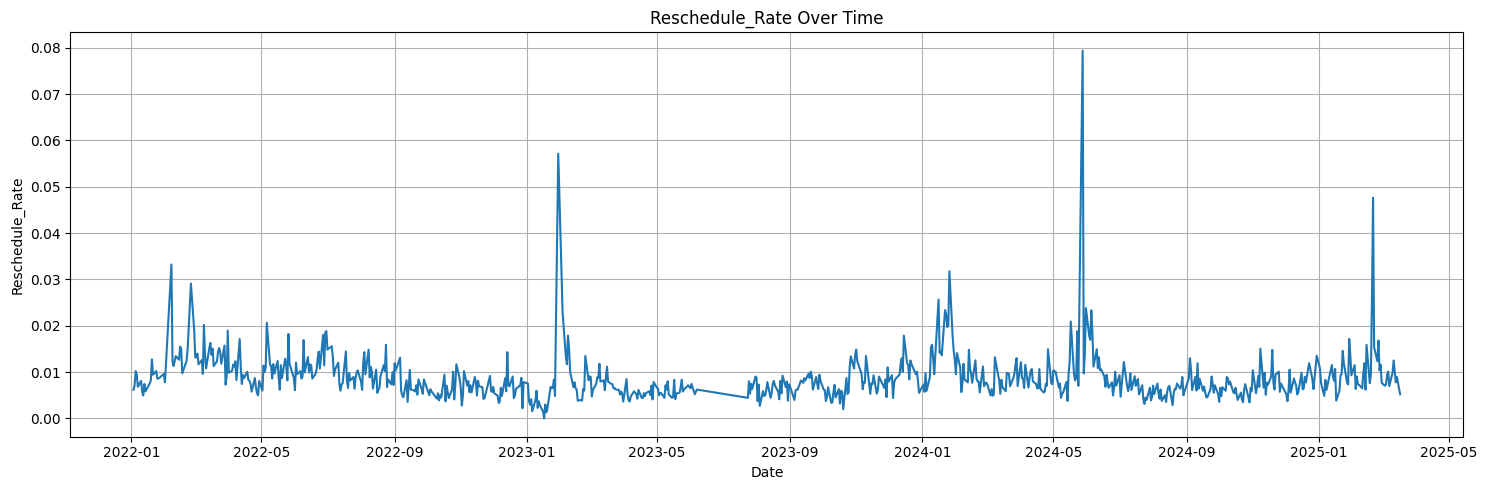

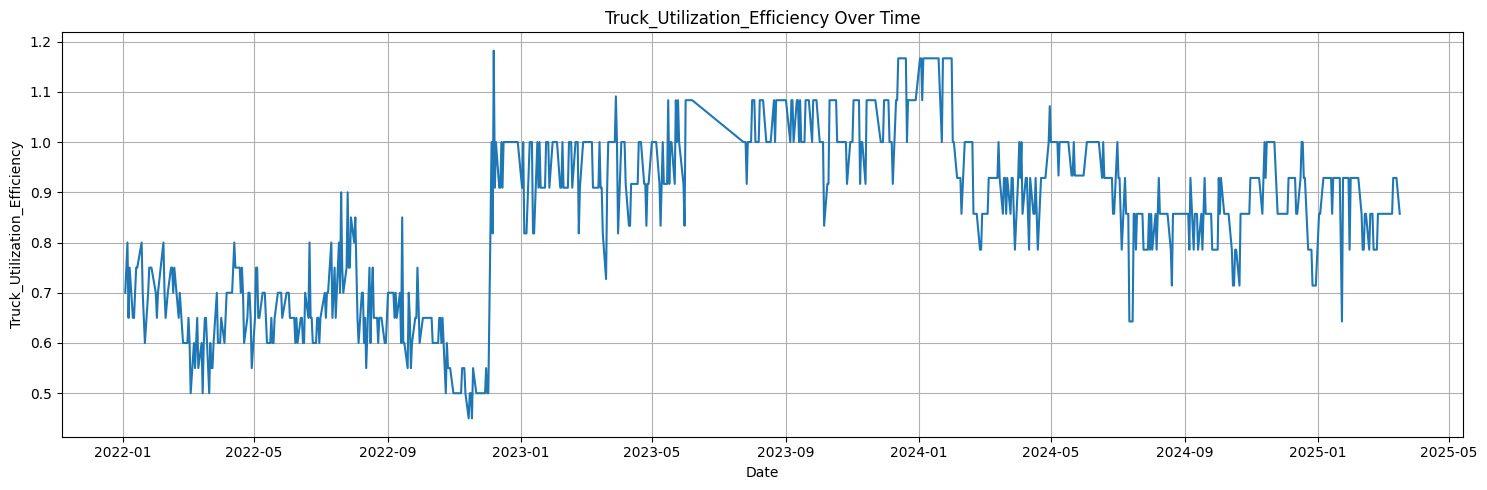

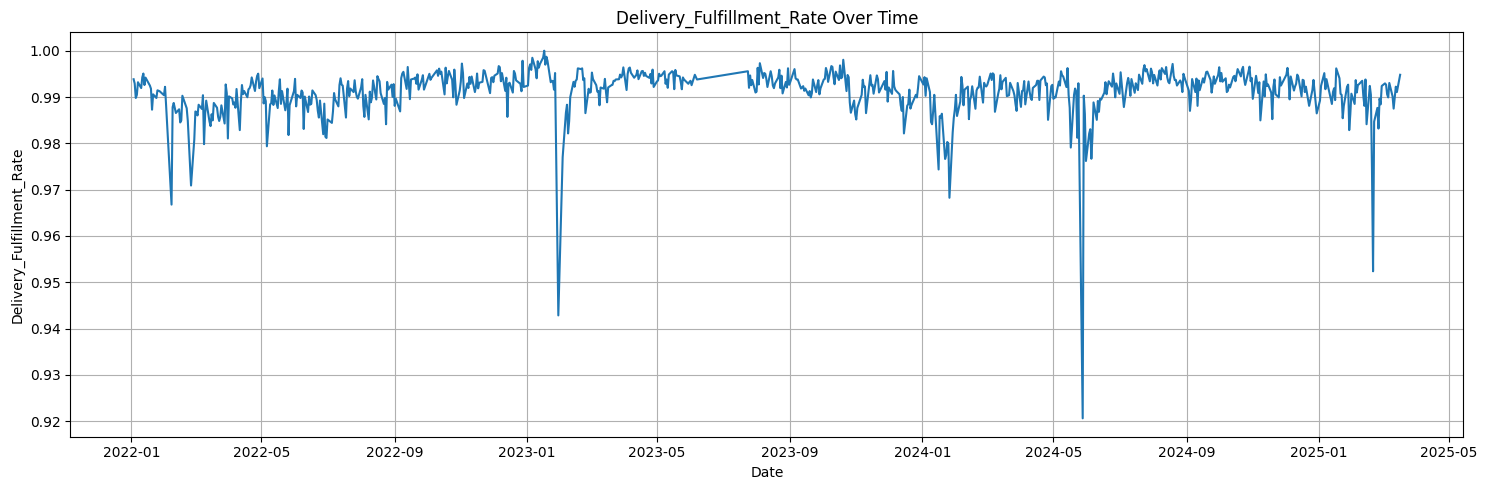

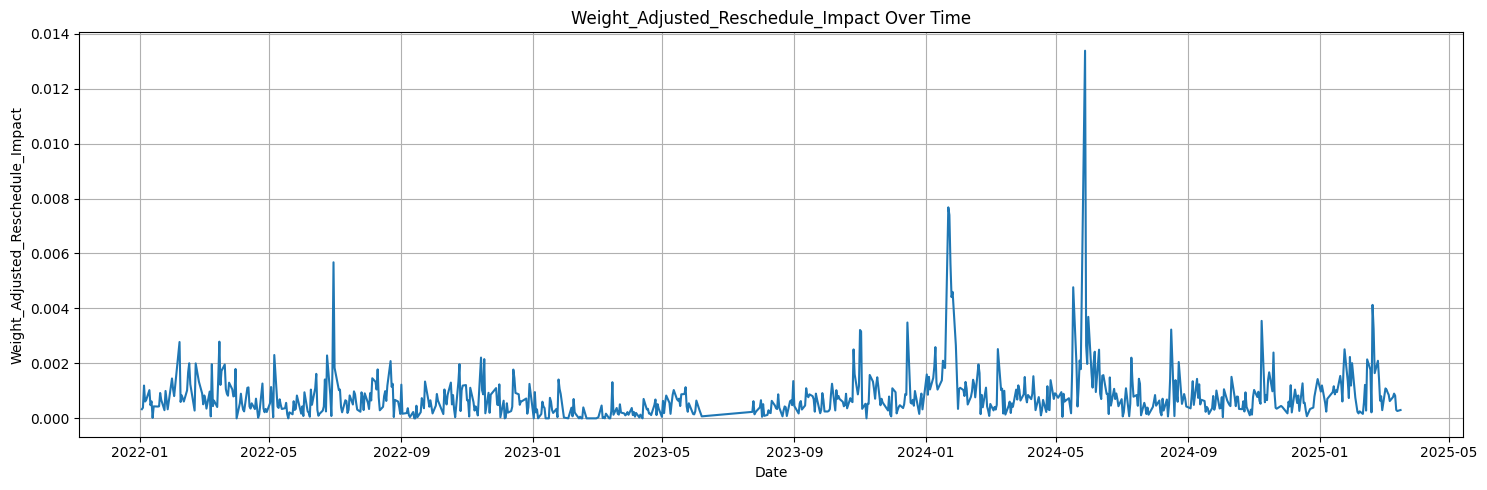

In [3]:
column_names = ['Reschedule_Rate', 'Truck_Utilization_Efficiency', 'Delivery_Fulfillment_Rate', 'Weight_Adjusted_Reschedule_Impact']
for column in column_names:
    ut.plot_time_series(df, column_name=column, title=f'{column} Over Time', xlabel='Date', ylabel=column)

Seems like dependent variables are stable, visually looks like homoskedasticity, no need for log transforming for now.

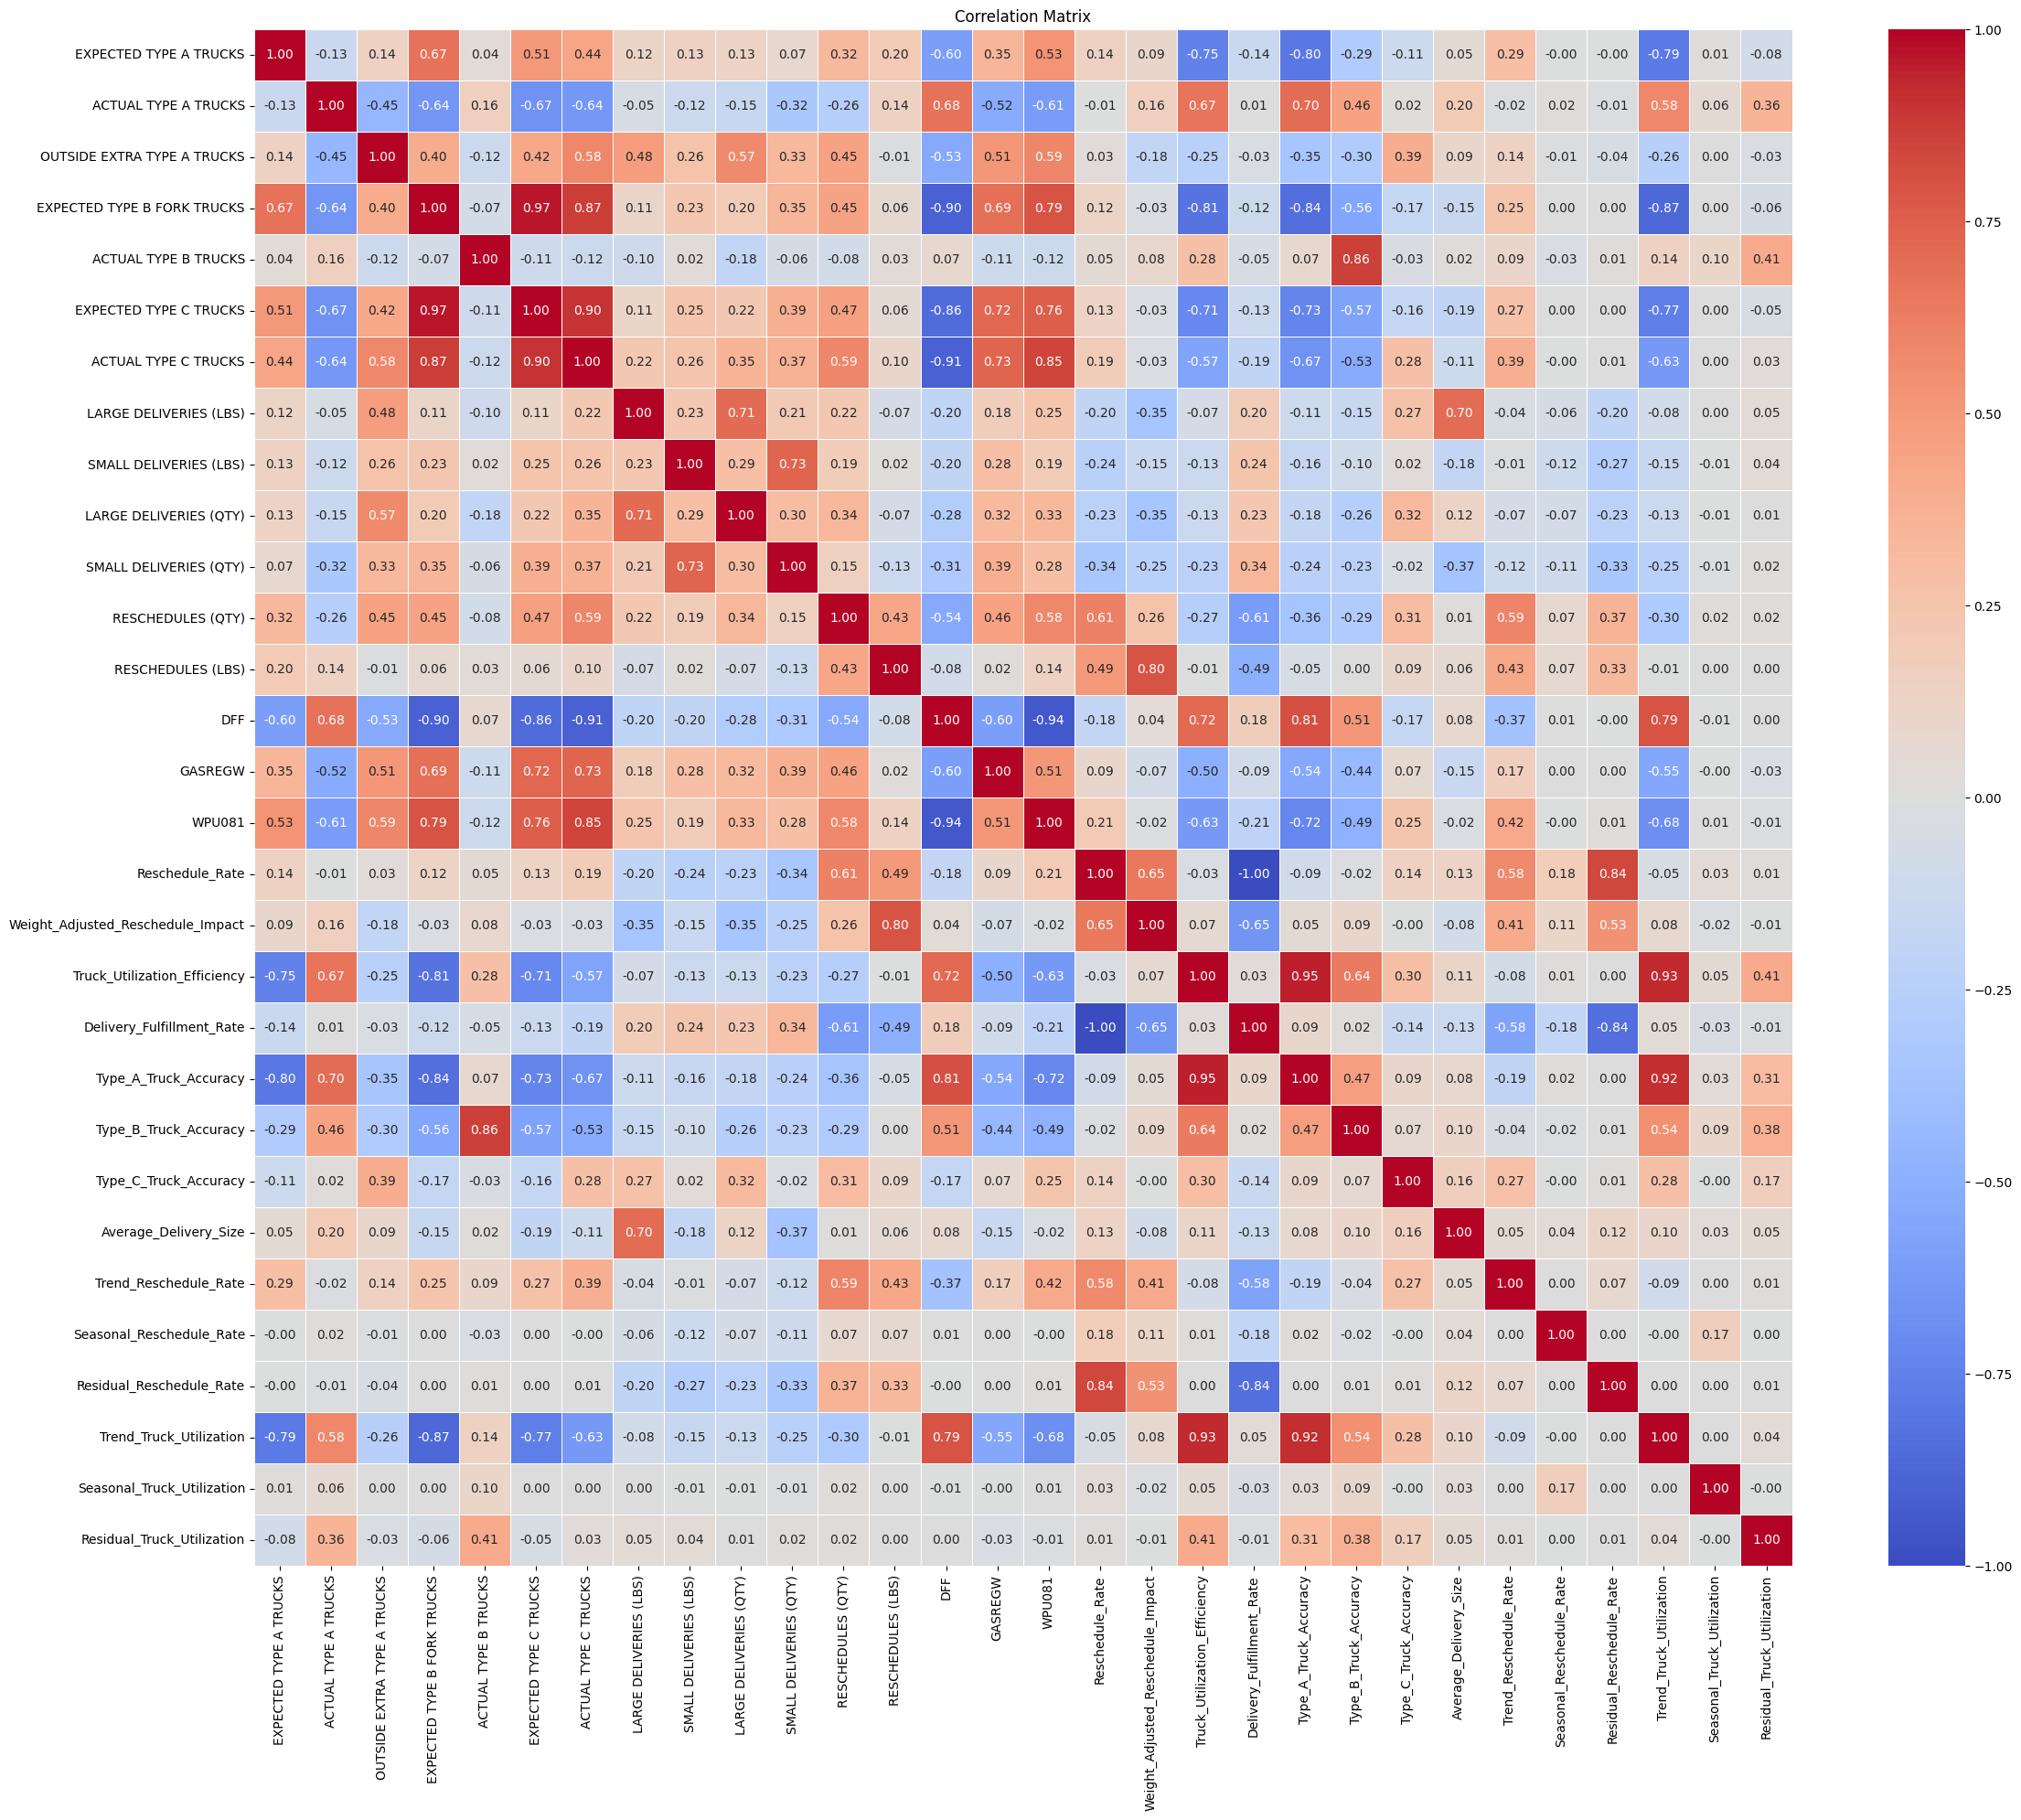

In [4]:
ut.plot_correlation_heatmap(df, columns=None, title='Correlation Matrix', figsize=(24, 20))

Let's move on to outlier detection

In [5]:
series_names = ['Reschedule_Rate', 'Truck_Utilization_Efficiency', 'Delivery_Fulfillment_Rate', 'Weight_Adjusted_Reschedule_Impact', 'RESCHEDULES (QTY)', 'RESCHEDULES (LBS)', 'EXPECTED TYPE A TRUCKS', 'EXPECTED TYPE B FORK TRUCKS', 'EXPECTED TYPE C TRUCKS', 'ACTUAL TYPE A TRUCKS', 'ACTUAL TYPE B TRUCKS', 'ACTUAL TYPE C TRUCKS', 'Type_A_Truck_Accuracy', 'Type_B_Truck_Accuracy', 'Type_C_Truck_Accuracy', 'LARGE DELIVERIES (QTY)', 'SMALL DELIVERIES (QTY)', 'LARGE DELIVERIES (LBS)', 'SMALL DELIVERIES (LBS)', 'WPU081', 'GASREGW', 'DFF']

for series in series_names:
    ut.identify_outliers_iqr(df[series], series_name = series, multiplier=1.5)

Identified 35 potential outliers for 'Reschedule_Rate' using IQR method (multiplier=1.5).
Identified 0 potential outliers for 'Truck_Utilization_Efficiency' using IQR method (multiplier=1.5).
Identified 35 potential outliers for 'Delivery_Fulfillment_Rate' using IQR method (multiplier=1.5).
Identified 40 potential outliers for 'Weight_Adjusted_Reschedule_Impact' using IQR method (multiplier=1.5).
Identified 15 potential outliers for 'RESCHEDULES (QTY)' using IQR method (multiplier=1.5).
Identified 22 potential outliers for 'RESCHEDULES (LBS)' using IQR method (multiplier=1.5).
Identified 0 potential outliers for 'EXPECTED TYPE A TRUCKS' using IQR method (multiplier=1.5).
Identified 0 potential outliers for 'EXPECTED TYPE B FORK TRUCKS' using IQR method (multiplier=1.5).
Identified 0 potential outliers for 'EXPECTED TYPE C TRUCKS' using IQR method (multiplier=1.5).
Identified 0 potential outliers for 'ACTUAL TYPE A TRUCKS' using IQR method (multiplier=1.5).
Identified 0 potential outlie